##### Objective:
##### 1) To classify images of cats and dogs
##### 2) Build Convolutional Neural Networks
##### 3) Performance of the model
## **Library Declaration**

In [ ]:
# Importing the Keras libraries and packages
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

## Unzipping and Loading Dataset to the Console

In [ ]:
!unzip "/content/drive/MyDrive/cats_and_dogs_filtered" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.108.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.109.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.11.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.110.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.111.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.112.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.113.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.114.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.115.jpg  
  inflating: /content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.116.jpg  
  inflating: /conten

## Dataloading

In [ ]:
base_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

## Setting Model Parameters

In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

## Model Creation

In [ ]:
# Initialising the CNN
classifier = Sequential()

In [ ]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))

In [ ]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(2, 2))

In [ ]:
# Step 1 & 2 with more hidden layers
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Conv2D(128, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Conv2D(128, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

In [ ]:
# Step 3 - Dropout
classifier.add(Dropout(0.5))

Adding a second convolutional layer classifier.add(Conv2D(32, (3, 3), activation = 'relu')) classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
#  Step 4 - Flattening
classifier.add(Flatten())

In [ ]:
# Step 5 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'softmax'))

In [ ]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Data Augmentation and Preparation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
training_set = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
validation_set = validation_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                        directory=validation_dir,
                                                        target_size=(IMG_SHAPE, IMG_SHAPE),
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


## Train the Model

In [ ]:
epochs=100
history = classifier.fit_generator(
    training_set,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validation_set,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
20/20 [==============================] - 108s 5s/step - loss: 0.7143 - accuracy: 0.4854 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 102s 5s/step - loss: 0.6894 - accuracy: 0.5306 - val_loss: 0.6843 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 102s 5s/step - loss: 0.6836 - accuracy: 0.5550 - val_loss: 0.7086 - val_accuracy: 0.5110
Epoch 4/100
20/20 [==============================] - 101s 5s/step - loss: 0.6922 - accuracy: 0.5336 - val_loss: 0.6625 - val_accuracy: 0.6030
Epoch 5/100
20/20 [==============================] - 102s 5s/step - loss: 0.6757 - accuracy: 0.5684 - val_loss: 0.6619 - val_accuracy: 0.5810
Epoch 6/100
20/20 [==============================] - 101s 5s/step - loss: 0.6656 - accuracy: 0.5800 - val_loss: 0.6615 - val_accuracy: 0.5730
Epoch 7/100
20/20 [==============================] - 108s 5s/step - loss: 0.6597 - accuracy: 0.5855 - val_loss: 0.6482 - val_accuracy: 0.5890
Epoch 

## Training Result Visualization

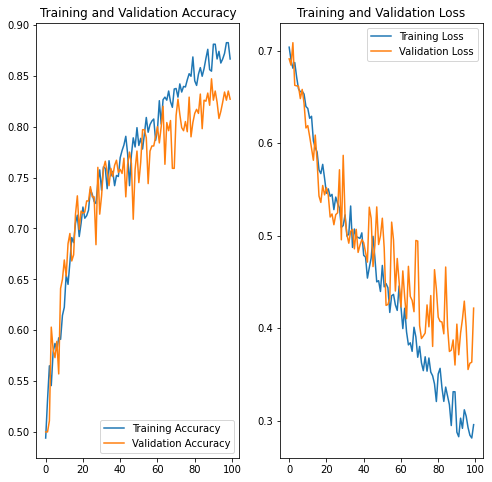

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()